## About Dataset

#### Context
- "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Exploration & Data loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/mauroperez/Desktop/Telco-Customer-Churn-ML/data/raw/ds_mujer_individual_full.csv')
df.shape

(14556, 15)

In [3]:
df1 = pd.read_csv("/Users/mauroperez/Desktop/Telco-Customer-Churn-ML/data/raw/ds_mujer_individual_full.csv")
df1.head(1)

,EDAD,EC,TIPOHO,REGVI,PAGOVI,ESTUDIOSA,INGRESOS,NHOGAR,TRABAJAACT,JORNADA,METROSRESID,INGREHOG_INTER,INGREHOG,INGRESOSPAR,NHIJOBIO
0,25,1,4,1,0,6,4,3,1,1.0,1.6667,5,NaN,NaN,0


In [4]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [5]:
df.describe(include='all')

,EDAD,EC,TIPOHO,REGVI,PAGOVI,ESTUDIOSA,INGRESOS,NHOGAR,TRABAJAACT,JORNADA,METROSRESID,INGREHOG_INTER,INGREHOG,INGRESOSPAR,NHIJOBIO
count,14556.000000,14556.000000,14556.000000,14556.000000,14556.000000,14556.000000,14556.000000,14556.000000,14556.000000,9182.000000,14556.000000,14556.000000,10646.000000,10717.000000,14556.000000
mean,39.178621,1.824746,3.712696,2.391454,1.160827,5.266007,2.933567,3.263465,2.845974,1.740253,1.967208,4.266076,3899.554668,3.961650,1.009275
std,10.578407,1.002022,1.504522,1.409968,1.196712,2.044742,1.583641,1.221827,2.413017,0.830309,1.136341,1.987983,25887.592229,1.545902,1.059668
min,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.142900,1.000000,0.000000,1.000000,0.000000
25%,31.000000,1.000000,3.000000,1.000000,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.250000,3.000000,1000.000000,3.000000,0.000000
50%,41.000000,2.000000,4.000000,2.000000,1.000000,6.000000,3.000000,3.000000,1.000000,1.000000,1.666700,4.000000,1700.000000,4.000000,1.000000
75%,48.000000,2.000000,4.000000,3.000000,2.000000,7.000000,4.000000,4.000000,6.000000,2.000000,2.333300,6.000000,2500.000000,5.000000,2.000000
max,55.000000,5.000000,9.000000,6.000000,5.000000,9.000000,9.000000,15.000000,6.000000,3.000000,10.000000,8.000000,999999.000000,9.000000,9.000000


In [6]:
df = df[['EDAD', 'EC', 'PAGOVI','ESTUDIOSA','INGRESOS','NHOGAR','TRABAJAACT','INGREHOG_INTER','NHIJOBIO']]

In [7]:
df = df.rename(columns={
        'EDAD': 'age',
        'EC': 'married',
        'PAGOVI': 'housing_payment',
        'ESTUDIOSA': 'level_studies',
        'INGRESOS': 'income',
        'NHOGAR': 'number_living',
        'TRABAJAACT': 'job',
        'INGREHOG_INTER': 'house_income',
        'NHIJOBIO': 'nr_children'
    })

df.head(5)

,age,married,housing_payment,level_studies,income,number_living,job,house_income,nr_children
0,25,1,0,6,4,3,1,5,0
1,51,2,0,8,8,4,1,7,2
2,35,1,0,8,1,3,6,4,0
3,38,2,2,4,1,4,1,1,2
4,54,2,0,6,1,3,6,5,0


- based on the .describe (and exploration) we can see that most categorical variables have between 2, 3, or 4 categories 
- So for those that only have 2 (binary) let's just replace by 0 and 1
- For those that have 3 or 4 we can do One-Hot encoding

## Data Transformation

In [8]:
# Binary definition for binary cols

df["married"] = df["married"].isin([2, 3, 5]).astype(int)
df['job'] = df["job"].isin([1]).astype(int)

df.head(5)

,age,married,housing_payment,level_studies,income,number_living,job,house_income,nr_children
0,25,0,0,6,4,3,1,5,0
1,51,1,0,8,8,4,1,7,2
2,35,0,0,8,1,3,0,4,0
3,38,1,2,4,1,4,1,1,2
4,54,1,0,6,1,3,0,5,0


In [9]:
# Transformation to multi values cols - reagrupping information

mapping = {1: 1, 2: 1, 3: 2,4: 2,5: 2,6: 3, 7: 3, 8: 4, 9: 4}
df["level_studies"] = df["level_studies"].map(mapping)

df["number_living"] = (df["number_living"] < 4).astype(int)

mapping = {1: 1, 2: 1, 3: 1,4: 2,5: 2,6: 3, 7: 3, 8: 3, 9: 3}
df["income"] = df["income"].map(mapping)

mapping = {1: 1, 2: 1, 3: 1,4: 2,5: 2,6: 3, 7: 3, 8: 3, 9: 3}
df["house_income"] = df["house_income"].map(mapping)


df["age"] = (df["age"] >= 30).astype(int)


df.head(5)

,age,married,housing_payment,level_studies,income,number_living,job,house_income,nr_children
0,0,0,0,3,2,1,1,2,0
1,1,1,0,4,3,0,1,3,2
2,1,0,0,4,1,1,0,2,0
3,1,1,2,2,1,0,1,1,2
4,1,1,0,3,1,1,0,2,0


In [10]:
df.housing_payment.value_counts()

housing_payment
0    6408
2    4635
1    1734
3    1364
4     274
5     141
Name: count, dtype: int64

In [104]:
## We are also transforming 'target' column as we just want to predict childlesness

df["nr_children"] = (df["nr_children"] > 0).astype(int)


## Binary Encoding

In [12]:
# Binary categorical columns (2 unique values)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

# Map Yes/No and Male/Female to 0/1
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})


## One-Hot encoding

In [114]:
# Categorical columns with > 2 unique values
multi_cat_cols = ['housing_payment','level_studies','income','number_living','house_income']

# One-hot encode
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [11]:
df.head()

,age,married,housing_payment,level_studies,income,number_living,job,house_income,nr_children
0,0,0,0,3,2,1,1,2,0
1,1,1,0,4,3,0,1,3,2
2,1,0,0,4,1,1,0,2,0
3,1,1,2,2,1,0,1,1,2
4,1,1,0,3,1,1,0,2,0


## Cleaning

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df = df.drop('customerID', axis=1)

In [116]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int) # converts True/False to 1/0 for all boolean cols

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14556 entries, 0 to 14555
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                14556 non-null  int64
 1   married            14556 non-null  int64
 2   job                14556 non-null  int64
 3   nr_children        14556 non-null  int64
 4   housing_payment_1  14556 non-null  int64
 5   housing_payment_2  14556 non-null  int64
 6   housing_payment_3  14556 non-null  int64
 7   housing_payment_4  14556 non-null  int64
 8   housing_payment_5  14556 non-null  int64
 9   level_studies_2    14556 non-null  int64
 10  level_studies_3    14556 non-null  int64
 11  level_studies_4    14556 non-null  int64
 12  income_2           14556 non-null  int64
 13  income_3           14556 non-null  int64
 14  number_living_1    14556 non-null  int64
 15  house_income_2     14556 non-null  int64
 16  house_income_3     14556 non-null  int64
dtypes: int64(17)

In [120]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['nr_children'].sort_values(ascending=False)
print(churn_corr)

nr_children          1.000000
married              0.592913
age                  0.489337
job                  0.071553
housing_payment_2    0.068199
income_3             0.042682
income_2             0.040694
housing_payment_1    0.037825
house_income_3       0.029415
level_studies_2      0.028019
housing_payment_3    0.018359
house_income_2       0.013254
housing_payment_5    0.010853
housing_payment_4    0.004944
level_studies_4     -0.050366
level_studies_3     -0.098203
number_living_1     -0.255513
Name: nr_children, dtype: float64


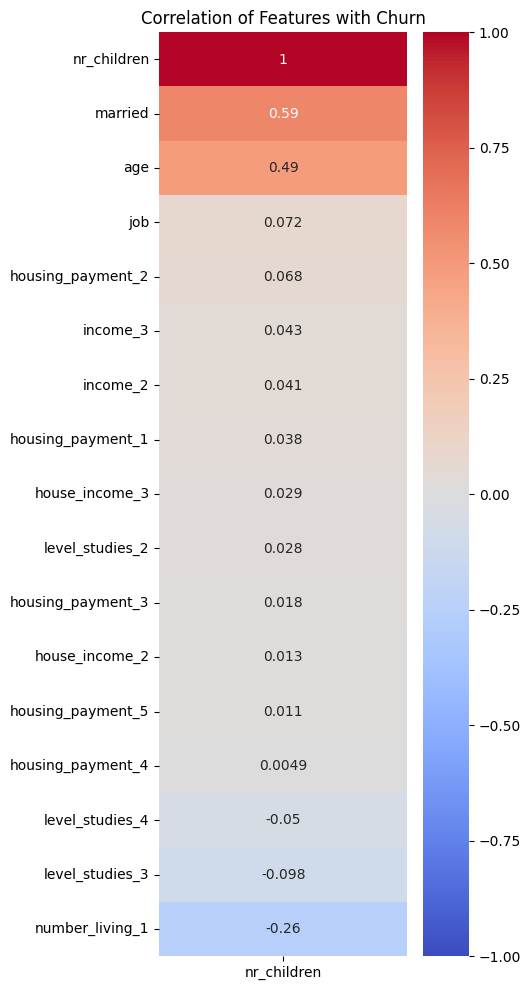

In [121]:
# Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['nr_children']].sort_values(by='nr_children', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()


Negative (lower value → less likely to churn):

- tenure (-0.35) → Customers who stay longer are less likely to churn.
- Contract_Two year (-0.30) → Customers on long-term contracts churn much less.
- Contract_One year (-0.18) → Same trend but weaker than two-year contracts.

Positive (higher value → more likely to churn):

- InternetService_Fiber optic (+0.31) → Fiber optic users churn more in this dataset.
- PaymentMethod_Electronic check (+0.30) → Customers paying electronically via check churn more.

## Look for multicolinearity (VIF)

In [18]:
# We need to collapse redundant columns before running VIF
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

# Drop the original redundant dummies
drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [125]:
df.head()

,age,married,job,nr_children,housing_payment_1,housing_payment_2,housing_payment_3,housing_payment_4,housing_payment_5,level_studies_2,level_studies_3,level_studies_4,income_2,income_3,number_living_1,house_income_2,house_income_3
0,25,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0
1,51,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1
2,35,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,38,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,54,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


In [124]:
# Prepare X
X = df.drop(columns=['nr_children'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [138]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

              feature        VIF
0                 age  10.655529
1             married   3.705275
2                 job   3.642426
9     level_studies_3   3.024872
8     level_studies_2   2.734163
13    number_living_1   2.379909
15     house_income_3   2.299254
10    level_studies_4   2.262954
11           income_2   2.018718
14     house_income_2   1.904866
4   housing_payment_2   1.701249
12           income_3   1.430254
3   housing_payment_1   1.296835
5   housing_payment_3   1.200669
6   housing_payment_4   1.041677
7   housing_payment_5   1.030504


In [135]:
df.drop(columns=['age'],inplace=True)

- Clearly we can see there's multicolinearity between features
- So either we need to drop some features or use regularization techniques like Lasso or Ridge regression to handle this
- Or use tree based models which are less sensitive to multicollinearity
- In decision trees, splits are based on feature importance for reducing impurity — redundant features just compete, but won’t cause unstable predictions.

## Machine learning

In [140]:
# We have a class imbalance problem
# Given your imbalance (27% churners), class weighting + threshold tuning is probably enough — no need for aggressive oversampling yet.
df['nr_children'].value_counts()

nr_children
1    8189
0    6367
Name: count, dtype: int64

In churn prediction, recall (and metrics derived from it, like F1) is usually the most important — here’s why:

1️⃣ Business context
Churn prediction is asymmetric in cost:

- False Negative (FN): You predict a customer will not churn, but they actually leave → you miss the chance to intervene and keep them.

- False Positive (FP): You predict a customer will churn, but they stay → you might spend some retention resources unnecessarily.

- Missing churners (FN) usually costs more than wrongly targeting a loyal customer.

Typical priority
- If retention campaigns are cheap → prioritize recall (catch every possible churner).
- If retention campaigns are expensive → balance precision and recall using F1 score or a precision-recall trade-off.
- If business wants a ranking of churn risk → use ROC-AUC or PR-AUC to evaluate the model.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['nr_children'])
y = df['nr_children']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

### RandomForest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # handles imbalance for you
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.846     0.648     0.734      1274
           1      0.769     0.908     0.833      1638

    accuracy                          0.795      2912
   macro avg      0.807     0.778     0.783      2912
weighted avg      0.803     0.795     0.790      2912



In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.760   0.933   0.838   
0.3     0.769   0.908   0.833   
0.35    0.775   0.886   0.827   
0.4     0.783   0.875   0.826   
0.45    0.791   0.854   0.821   
0.5     0.803   0.824   0.813   


→ You’re now catching 71.7% of actual churners with RandomForest

### LightGBM classifier

In [142]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Info] Number of positive: 6551, number of negative: 5093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 11644, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
⏱ Training time: 2.75 seconds
⏱ Prediction time: 0.0122 seconds
              precision    recall  f1-score   support

           0      0.891     0.668     0.764      1274
           1      0.784     0.937     0.853      1638

    accuracy                          0.819      2912
   macro avg      0.837     0.802     0.808      2912
weighted avg      0.831     0.819     0.814      2912



→ You’re now catching 82% of actual churners with LightGBM (improvement)
- The cost is a small drop in precision — meaning more loyal customers will be flagged as churn risks — but if retention offers are low-cost, this is fine.

In [143]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.773   0.953   0.853   
0.3     0.784   0.937   0.853   
0.35    0.791   0.922   0.851   
0.4     0.803   0.906   0.851   
0.45    0.808   0.889   0.846   
0.5     0.818   0.864   0.841   


### XGBoost Classifier

In [144]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.88 seconds
⏱ Prediction time: 0.0065 seconds
              precision    recall  f1-score   support

           0      0.893     0.665     0.762      1274
           1      0.783     0.938     0.853      1638

    accuracy                          0.819      2912
   macro avg      0.838     0.802     0.808      2912
weighted avg      0.831     0.819     0.814      2912



In [145]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.773   0.951   0.852   
0.3     0.783   0.938   0.853   
0.35    0.793   0.920   0.852   
0.4     0.804   0.904   0.851   
0.45    0.811   0.885   0.846   
0.5     0.818   0.869   0.843   


### ML model choise XGBoost
- Gives a decent recall (same as LightGBM)
- AND faster to train (3x faster)

## Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFlow)

In [146]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2026-02-02 18:47:29,034] A new study created in memory with name: no-name-18884f02-fc2d-4859-b245-8ad9bfe389b0
[I 2026-02-02 18:47:29,376] Trial 0 finished with value: 0.9322344322344323 and parameters: {'n_estimators': 635, 'learning_rate': 0.10516694599504788, 'max_depth': 4, 'subsample': 0.900473511713813, 'colsample_bytree': 0.6713988020294881, 'min_child_weight': 6, 'gamma': 1.6018636426849446, 'reg_alpha': 2.4238876251566612, 'reg_lambda': 2.8986656388985663}. Best is trial 0 with value: 0.9322344322344323.
[I 2026-02-02 18:47:29,712] Trial 1 finished with value: 0.927960927960928 and parameters: {'n_estimators': 749, 'learning_rate': 0.1050162195297783, 'max_depth': 3, 'subsample': 0.855874885078749, 'colsample_bytree': 0.9478627275822277, 'min_child_weight': 7, 'gamma': 3.38783378812266, 'reg_alpha': 1.9029431758367221, 'reg_lambda': 2.3794882054379047}. Best is trial 0 with value: 0.9322344322344323.
[I 2026-02-02 18:47:30,024] Trial 2 finished with value: 0.937118437118437

Best Params: {'n_estimators': 795, 'learning_rate': 0.1973941797669938, 'max_depth': 6, 'subsample': 0.9903796573722324, 'colsample_bytree': 0.8452572869560531, 'min_child_weight': 1, 'gamma': 0.011354065080071255, 'reg_alpha': 3.598090289931632, 'reg_lambda': 0.1283110964339739}
Best Recall: 0.9444444444444444


In [147]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.59 seconds
⏱ Prediction time: 0.0042 seconds
              precision    recall  f1-score   support

           0      0.903     0.668     0.768      1274
           1      0.785     0.944     0.858      1638

    accuracy                          0.823      2912
   macro avg      0.844     0.806     0.813      2912
weighted avg      0.837     0.823     0.818      2912



In [148]:
import mlflow
import mlflow.sklearn  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

# Force MLflow to always use the project root's mlruns folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # Calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    # Log parameters
    mlflow.log_params(best_params)

    # Training timer
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    # Prediction
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

/Users/mauroperez/Desktop/Telco-Customer-Churn-ML/.venv/lib/python3.11/site-packages/mlflow/utils/requirements_utils.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # noqa: TID251
2026/02/02 18:49:05 INFO mlflow.tracking.fluent: Experiment with name 'Telco Churn - XGBoost' does not exist. Creating a new experiment.
/Users/mauroperez/Desktop/Telco-Customer-Churn-ML/.venv/lib/python3.11/site-packages/xgboost/sklearn.py:1028: UserWarning: [18:49:06] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


              precision    recall  f1-score   support

           0      0.903     0.668     0.768      1274
           1      0.785     0.944     0.858      1638

    accuracy                          0.823      2912
   macro avg      0.844     0.806     0.813      2912
weighted avg      0.837     0.823     0.818      2912



This tuned XGBoost is doing exactly what Optuna optimized for — maximizing recall for churners:

- Recall (class 1): 0.928 ✅ (highest we’ve seen so far)

- Precision (class 1): 0.442 (low — many loyal customers are being flagged)

- F1 (class 1): 0.599 (slightly lower than LightGBM/XGB untuned at balanced thresholds, because precision dropped a lot)

Interpretation

- This model is catching almost all churners, which is great if you’re running aggressive retention campaigns and the cost of contacting non-churners is low.

- But the low precision means more than half of the people you target won’t actually churn.